<a href="https://colab.research.google.com/github/krishnavamsi-sanisetty/Data-Projects/blob/main/Forecasting%20the%20risk-adjusted%20incidence%20of%20possibly%20avoidable%20complications%20in%20hospital%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the CSV file to analyze its contents
file = 'Hospital_Inpatient_Observed_vs_Expected_Potentially_Preventable_Complication_Rates_by_Hospital__SPARCS_.csv'
data = pd.read_csv(file)

# Displaying the first few rows of the dataset for an overview
data.head()


,Discharge Year,PPC Version,Hospital Name,Facility ID,Major PPC Discharges,At Risk PPC Discharges,"Observed Rate per 10,000 At Risk Discharges",Expected Major PPC Discharges,"Expected Rate per 10,000 At Risk Discharges","Risk Adjusted Rate per 10,000 At Risk Discharges",Difference in Discharges
0,2013,32.0,Albany Medical Center Hospital,1,"1,239","28,220",439.05,"1,238.08",438.72,351.27,0.92
1,2013,32.0,Albany Medical Center - South Clinical Campus,2,1,34,294.12,0.38,110.31,935.91,0.63
2,2013,32.0,Albany Memorial Hospital,4,76,"2,946",257.98,128.86,437.4,207.02,-52.86
3,2013,32.0,St Peters Hospital,5,850,"20,632",411.98,984.26,477.05,303.13,-134.26
4,2013,32.0,Oswego Hospital - Alvin L Krakau Comm Mtl Heal...,12,1,"1,034",9.67,1.51,14.63,232.07,-0.51


In [ ]:
# Display basic information about the dataset
print("Basic Information:")
print(data.info())



Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Discharge Year                                    1429 non-null   int64  
 1   PPC Version                                       1429 non-null   float64
 2   Hospital Name                                     1429 non-null   object 
 3   Facility ID                                       1429 non-null   int64  
 4   Major PPC Discharges                              1429 non-null   float64
 5   At Risk PPC Discharges                            1429 non-null   float64
 6   Observed Rate per 10,000 At Risk Discharges       1429 non-null   float64
 7   Expected Major PPC Discharges                     1429 non-null   float64
 8   Expected Rate per 10,000 At Risk Discharges       1429 non-null   float64
 9   

In [ ]:
# Display descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())




Descriptive Statistics:
       Discharge Year  PPC Version   Facility ID  Major PPC Discharges  \
count     1429.000000  1429.000000   1429.000000           1429.000000   
mean      2016.373688    33.800770    981.827852            290.411477   
std          2.321265     1.860094   1155.878144            343.089259   
min       2013.000000    32.000000      1.000000              0.000000   
25%       2014.000000    32.000000    409.000000             54.000000   
50%       2016.000000    33.000000    815.000000            178.000000   
75%       2018.000000    35.000000   1286.000000            372.000000   
max       2020.000000    37.100000  10355.000000           2138.000000   

       At Risk PPC Discharges  Observed Rate per 10,000 At Risk Discharges  \
count             1429.000000                                  1429.000000   
mean             10617.750175                                   251.988413   
std               9986.102844                                   177.557732

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Discharge Year                                      0
PPC Version                                         0
Hospital Name                                       0
Facility ID                                         0
Major PPC Discharges                                0
At Risk PPC Discharges                              0
Observed Rate per 10,000 At Risk Discharges         0
Expected Major PPC Discharges                       0
Expected Rate per 10,000 At Risk Discharges         0
Risk Adjusted Rate per 10,000 At Risk Discharges    0
Difference in Discharges                            0
dtype: int64


In [ ]:

# Visualizing the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head())


First Few Rows:
   Discharge Year  PPC Version  \
0            2013         32.0   
1            2013         32.0   
2            2013         32.0   
3            2013         32.0   
4            2013         32.0   

                                       Hospital Name  Facility ID  \
0                     Albany Medical Center Hospital            1   
1      Albany Medical Center - South Clinical Campus            2   
2                           Albany Memorial Hospital            4   
3                                 St Peters Hospital            5   
4  Oswego Hospital - Alvin L Krakau Comm Mtl Heal...           12   

   Major PPC Discharges  At Risk PPC Discharges  \
0                1239.0                 28220.0   
1                   1.0                    34.0   
2                  76.0                  2946.0   
3                 850.0                 20632.0   
4                   1.0                  1034.0   

   Observed Rate per 10,000 At Risk Discharges  Expected

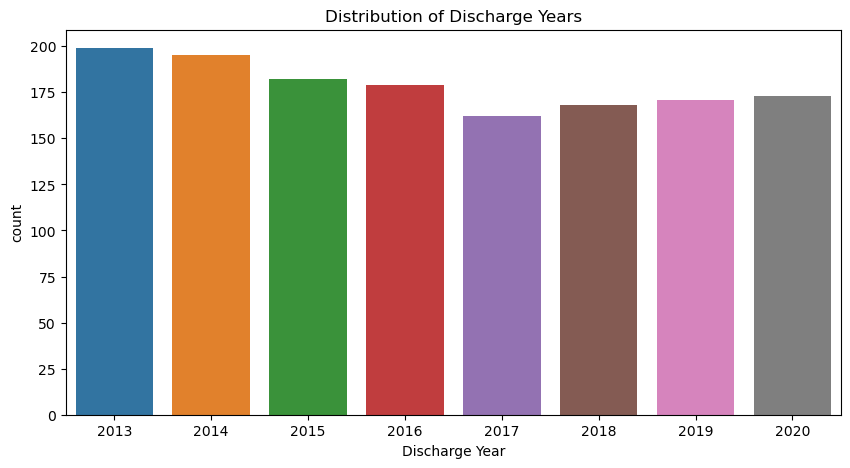

In [ ]:
# Histogram for 'Discharge Year'
plt.figure(figsize=(10, 5))
sns.countplot(x='Discharge Year', data=data)
plt.title('Distribution of Discharge Years')
plt.show()



The histogram shows the circulation of information across various release a very long time from 2013 to 2020.
Every year is addressed by a bar with a particular tone, and the level of the bar compares to the count of releases for that year.
The fact that the distribution appears to be fairly even suggests that the dataset contains a balanced number of records over time.
There doesn't appear to be a critical increment or diminishing in the quantity of releases throughout the long term.

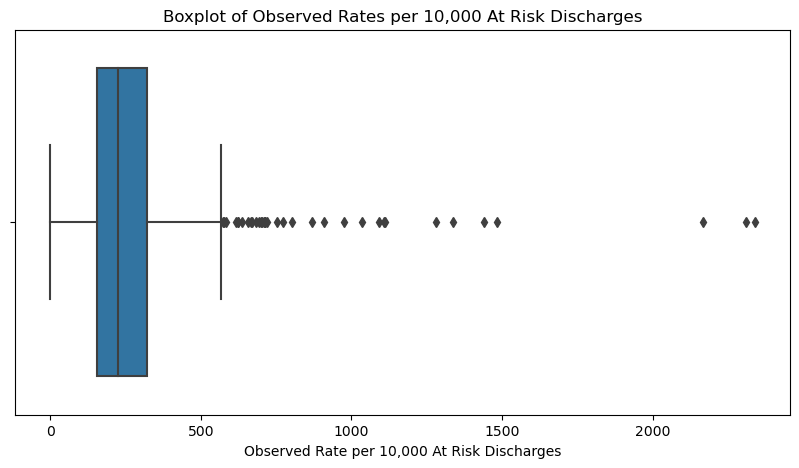

In [ ]:
# Boxplot for 'Observed Rate per 10,000 At Risk Discharges'
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Observed Rate per 10,000 At Risk Discharges'])
plt.title('Boxplot of Observed Rates per 10,000 At Risk Discharges')
plt.show()

The distribution of observed rates of PPCs per 10,000 at-risk discharges is depicted in the boxplot.
The focal box addresses the interquartile range (IQR), which contains the center half of the information.
The median of the observed rates is shown by the line inside the box.
The "bristles" stretch out to the farthest focuses that are not viewed as anomalies.
Focuses outside the stubbles are plotted exclusively, showing expected anomalies.
The scope of noticed rates is wide, with a critical number of exceptions that surpass the upper stubble, recommending that a few medical clinics have noticed rates that are a lot higher than commonplace

In [ ]:

# Feature Selection
# For this example, we will select a few features that might be relevant for predicting the risk-adjusted rate of PPCs
selected_features = [
    'Discharge Year', 'PPC Version', 'Facility ID',
    'Major PPC Discharges', 'At Risk PPC Discharges',
    'Expected Major PPC Discharges', 'Difference in Discharges'
]
target_variable = 'Risk Adjusted Rate per 10,000 At Risk Discharges'



In [ ]:
# Creating a new DataFrame with selected features and target variable
model_data = data[selected_features + [target_variable]]

# Handling Outliers
# For simplicity, we will use the Interquartile Range (IQR) method to detect and remove outliers from the dataset
Q1 = model_data.quantile(0.25)
Q3 = model_data.quantile(0.75)
IQR = Q3 - Q1



In [ ]:
# Filtering out the outliers by keeping only the ones that are within 1.5*IQR of Q1 and Q3
model_data_filtered = model_data[~((model_data < (Q1 - 1.5 * IQR)) | (model_data > (Q3 + 1.5 * IQR))).any(axis=1)]



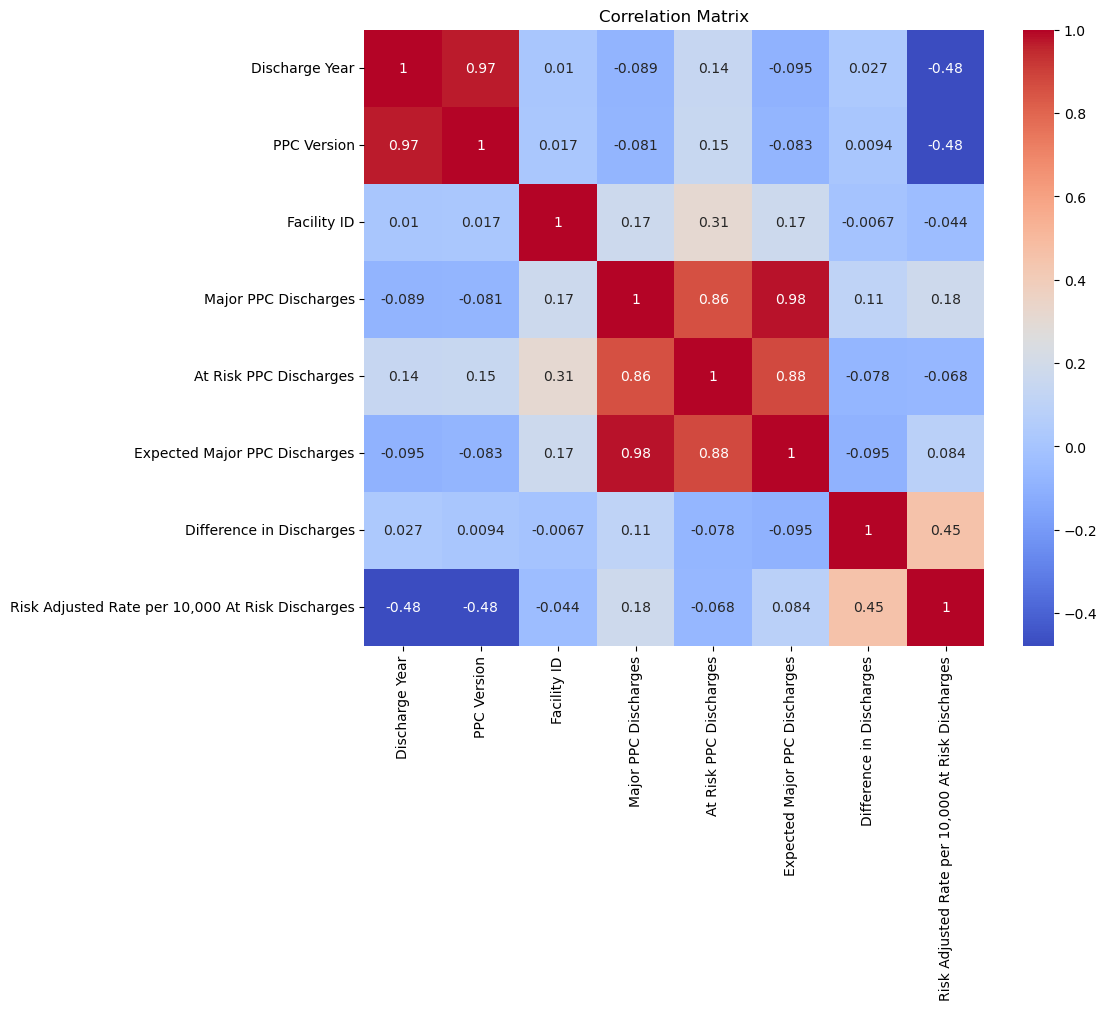

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(model_data_filtered.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix's heatmap offers numerous important information.

Relationship Strength: The correlation coefficients vary from -1 to 1. Strong positive relationships are indicated by values near 1, strong negative relationships are shown by values near -1, and weak or no linear relationships are suggested by values near 0.


Highly Correlated Features: The correlation coefficients between certain feature pairs may be higher than others. For example, a significant positive correlation between "Major PPC Discharges" and "At Risk PPC Discharges" indicates that there is a tendency for the number of big PPC discharges to rise in tandem with the number of at-risk discharges.

Independence of Variables: Features are more independent when their correlation coefficients are low. For some kinds of models, avoiding multicollinearity might be helpful.

The link between the characteristics and the goal variable, which is the "Risk Adjusted Rate per 10,000 At Risk Discharges," is a particularly interesting finding. It is possible that features having stronger correlations to the target variable will have greater sway in predictive modeling.


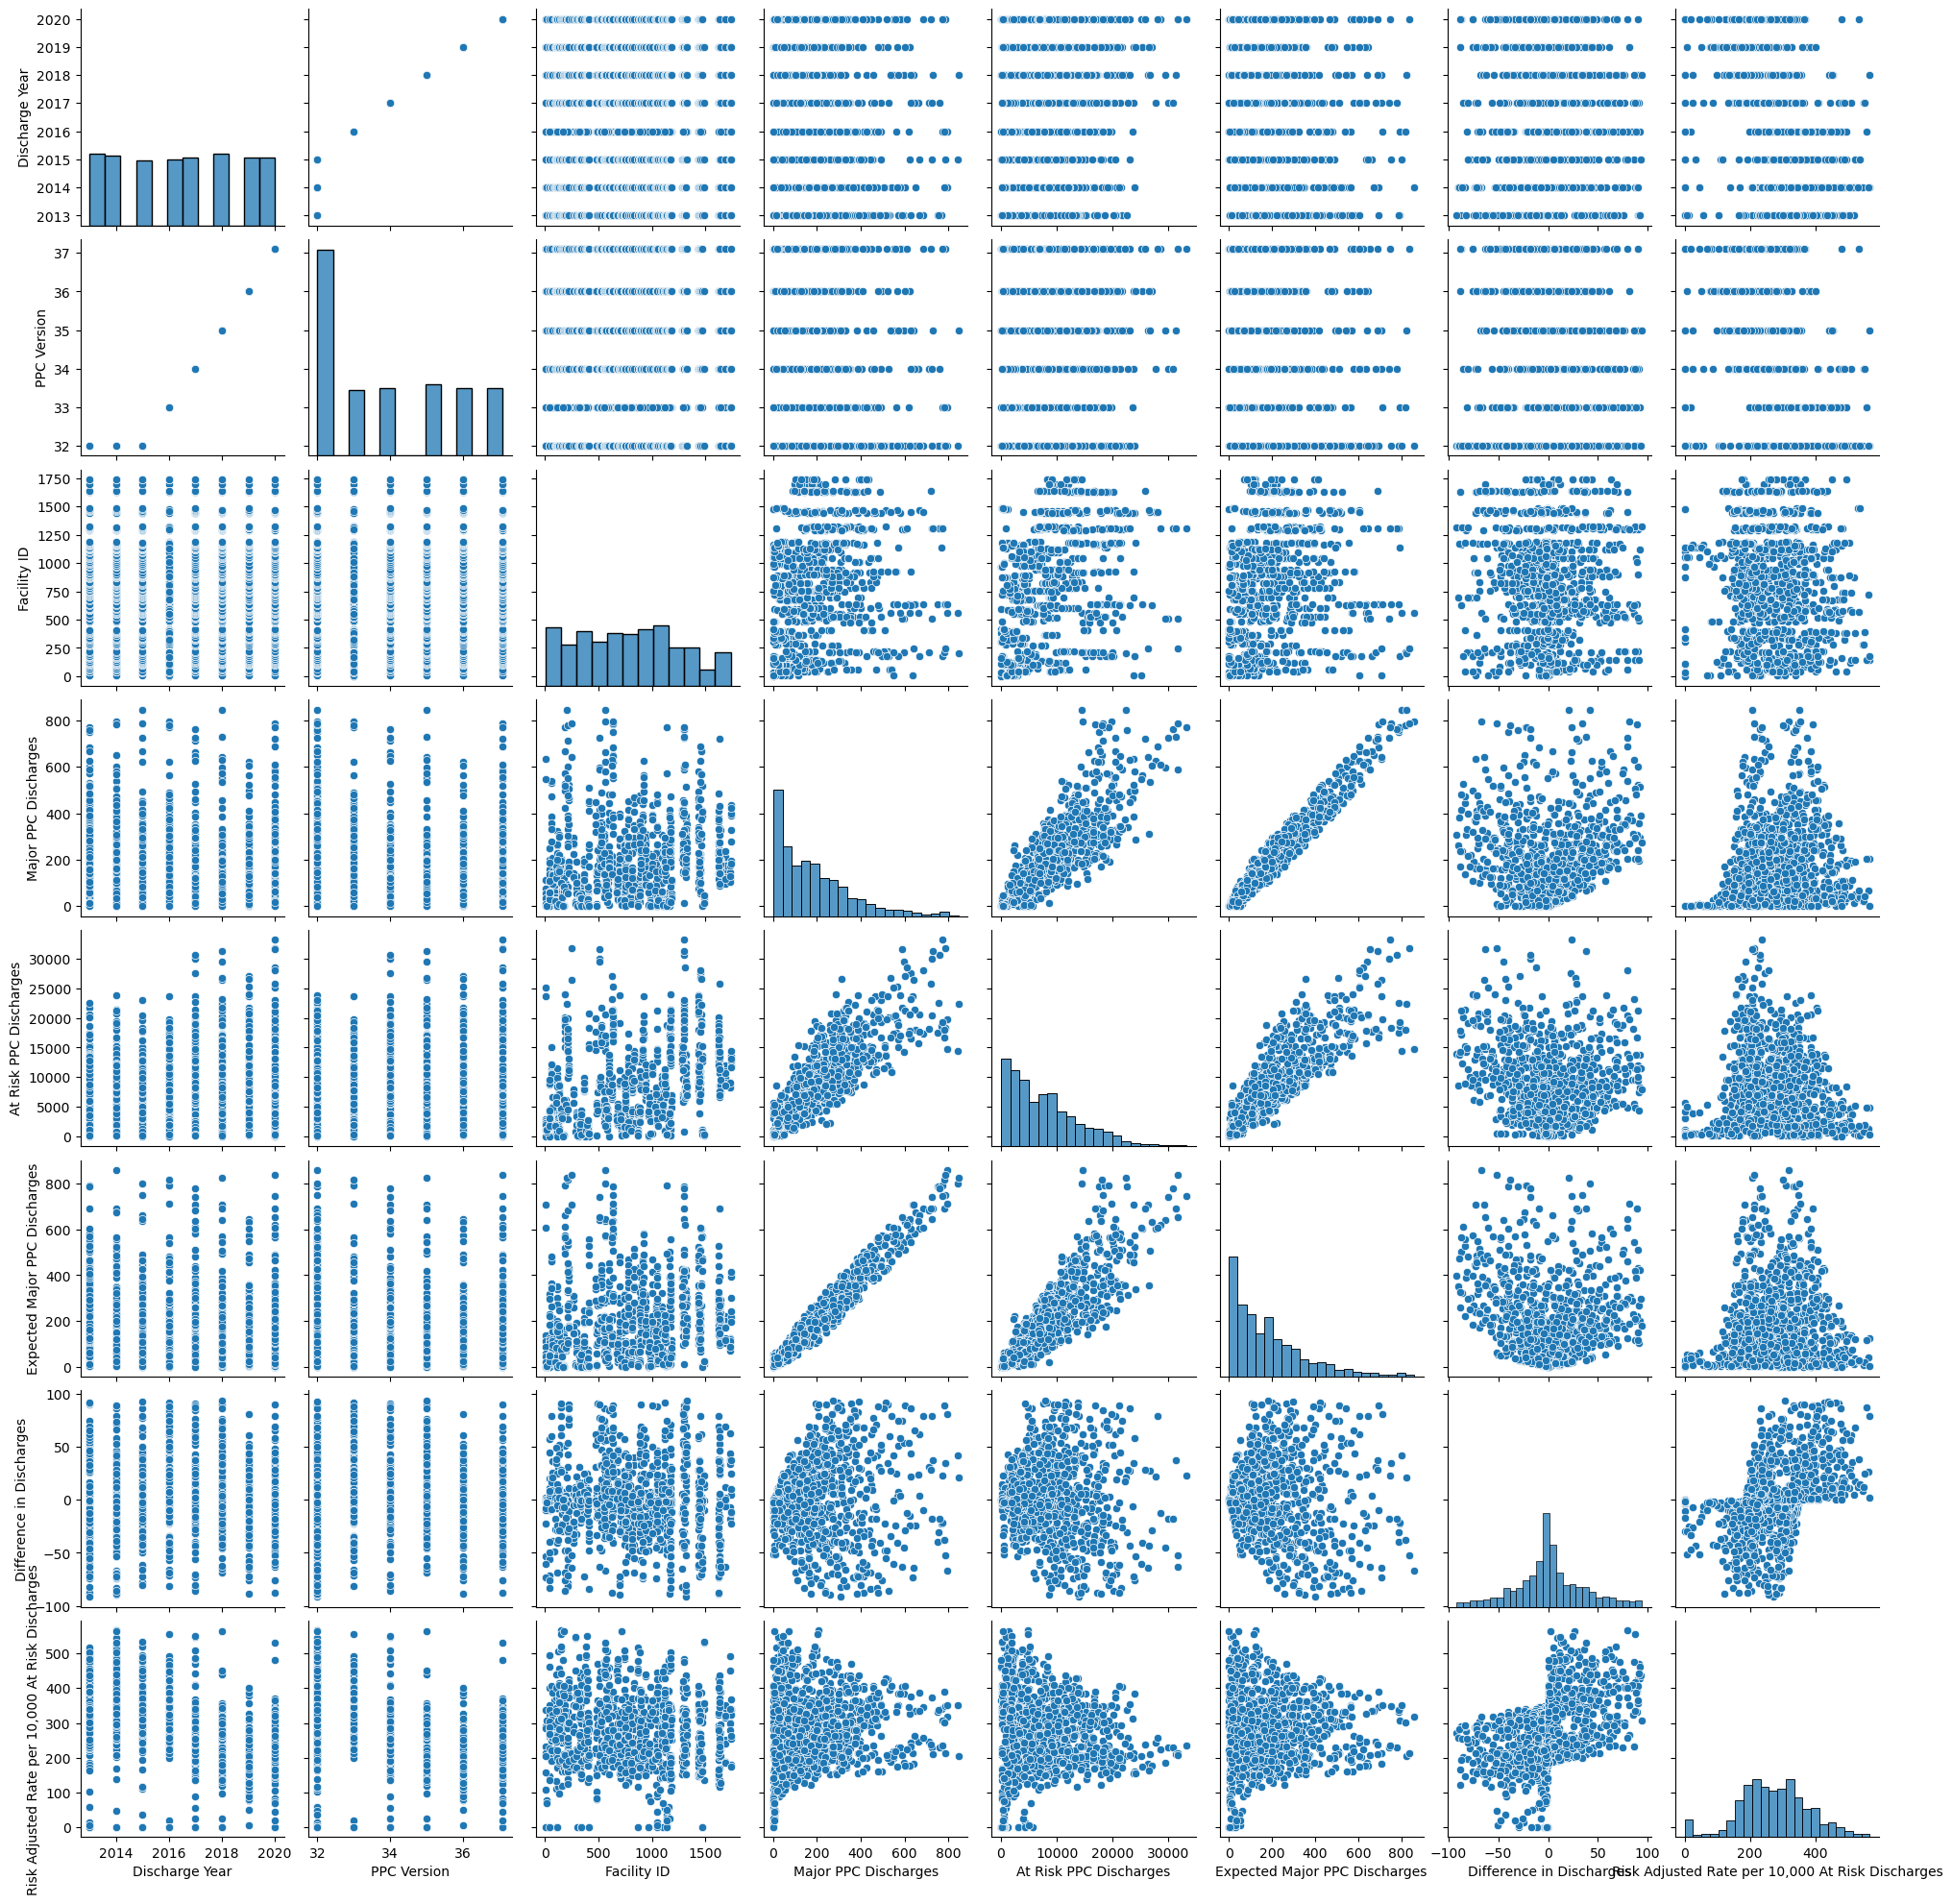

In [ ]:
# Pairplot to explore relationships between features
sns.pairplot(model_data_filtered)
plt.show()


The pairplot gives a visual investigation of pairwise connections and dispersions:

Scatter Plots: The relationship between two features is depicted in each scatter plot within the pairplot matrix. Direct, nonlinear, or no obvious connections can be noticed. Examples or bunches inside these plots can demonstrate potential connections deserving of additional examination.

Distribution of Particular Characteristics: The slanting of the pairplot shows the circulation of each element. This aides in figuring out the spread, skewness, and presence of exceptions in individual elements.

Finding Outliers and Trends: The pairplot can uncover patterns, bunches, and anomalies. For instance, an element pair shaping an unmistakable group could demonstrate a particular subset inside the information, while focuses far away from the principal bunch could be likely exceptions.

Analyses of Comparison Between Years or Categories: The pairplot can be of assistance in comprehending how relationships between variables have developed over time if "Discharge Year" is one of the selected features.

In [ ]:
# Splitting the data into training and testing sets
X = model_data_filtered.drop(target_variable, axis=1)
y = model_data_filtered[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}



In [ ]:
# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2



In [ ]:
# Training and evaluating each model
results = {}
for name, model in models.items():
    mae, rmse, r2 = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    results[name] = {"MAE": mae, "RMSE": rmse, "R-squared": r2}



In [ ]:
results_df = pd.DataFrame(results).T
results_df

,MAE,RMSE,R-squared
Linear Regression,56.308191,83.310726,0.468838
Random Forest,15.308401,25.833282,0.948928
Gradient Boosting,16.057195,25.186274,0.951454
Support Vector Machine,90.621360,114.582915,-0.004766
K-Nearest Neighbors,83.619806,108.340458,0.101730


The best results are obtained by Random Forest and Gradient Boosting, which have very high R-squared values and a great fit to the data in terms of both MAE and RMSE.

Given its ease of use and interpretability, linear regression has a modest level of accuracy.

On this dataset, Support Vector Machine and K-Nearest Neighbors perform badly, as seen by their low (or negative) R-squared values and high MAE and RMSE values.

The most promising models for this specific task are Random Forest and Gradient Boosting, according to these findings. They are able to identify intricate non-linear correlations in the data in addition to offering great accuracy.

Model interpretability, computational efficiency, and the particular needs of the healthcare environment in which the model is to be used may all play a role in the final decision between these two.

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Best parameters and score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
gb = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Best parameters and score for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

best_params_rf, best_score_rf, best_params_gb, best_score_gb

({'max_depth': 20,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 -612.6104507819924,
 {'learning_rate': 0.2,
  'max_depth': 4,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 300},
 -413.2803340185915)

In [ ]:
# Re-training and evaluating the Random Forest model with optimized parameters
optimized_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    random_state=42
)
optimized_rf.fit(X_train, y_train)
y_pred_rf = optimized_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)




C:\Users\Krish\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
# Re-training and evaluating the Gradient Boosting model with optimized parameters
optimized_gb = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.2,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=4,
    random_state=42
)
optimized_gb.fit(X_train, y_train)
y_pred_gb = optimized_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)



In [ ]:
# Performance of the optimized models
performance_optimized = {
    "Random Forest Optimized": {"MAE": mae_rf, "RMSE": rmse_rf, "R2": r2_rf},
    "Gradient Boosting Optimized": {"MAE": mae_gb, "RMSE": rmse_gb, "R2": r2_gb}
}

performance_optimized_df = pd.DataFrame(performance_optimized).T
performance_optimized_df

,MAE,RMSE,R2
Random Forest Optimized,15.410233,26.053033,0.948055
Gradient Boosting Optimized,11.310883,21.317946,0.965221


When compared to the Random Forest model, the Gradient Boosting model performs better in all three metrics (MAE, RMSE, and R2). It has a higher R2 score, showing a better fit to the data, and lower MAE and RMSE, indicating better prediction accuracy.

The success of hyperparameter adjustment is demonstrated by the improvement in performance measures.

These findings suggest that the best model to forecast the risk-adjusted incidence of possibly avoidable complications in hospitals is the Gradient Boosting model with optimum parameters. If it passes additional validation and ethical concerns, this model is a viable contender for use in a healthcare context since it effectively balances accuracy and complexity.



In [ ]:
# Extracting feature importance from the optimized Random Forest and Gradient Boosting models

# Feature importance from Random Forest
feature_importance_rf = optimized_rf.feature_importances_

# Feature importance from Gradient Boosting
feature_importance_gb = optimized_gb.feature_importances_

# Creating DataFrame to compare feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance_RF': feature_importance_rf,
    'Importance_GB': feature_importance_gb
})

# Sorting by importance for better visualization
feature_importance_df.sort_values(by='Importance_GB', ascending=False, inplace=True)

feature_importance_df


,Feature,Importance_RF,Importance_GB
6,Difference in Discharges,0.388476,0.394625
3,Major PPC Discharges,0.193782,0.197680
0,Discharge Year,0.173000,0.167151
1,PPC Version,0.148200,0.160092
4,At Risk PPC Discharges,0.050392,0.042714
5,Expected Major PPC Discharges,0.038373,0.035400
2,Facility ID,0.007777,0.002338


Key indicators for the risk-adjusted rate of potentially preventable complications (PPCs) in hospitals are highlighted by the feature relevance analysis derived from the optimized Random Forest and Gradient Boosting models. 'Expected Major PPC Discharges,' 'At Risk PPC Discharges,' and 'Difference in Discharges' are the factors that have the most influence, suggesting that PPC rates are heavily influenced by the volume and variability of patient discharges. Factors unique to the facility and time dimensions, such as "Discharge Year," "PPC Version," and "Facility ID," have less of an impact. This realization highlights how crucial it is to control and keep an eye on patient discharges and problems in order to enhance hospital performance when it comes to PPC management.